<a href="https://colab.research.google.com/github/MonSan436/Ejercicios-entregables-1/blob/main/Ejercicios_P1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**David Santiago Garzón Monje.**

**Matemáticas-Universidad Nacional de Colombia.**

**Ejercicios entregables: Introducción al aprendizaje de máquina.**

**Problema 1 (Ejercicio 1.2 del ligro guía):** Suponga que usamos el perceptrón para detectar spam. Supongamos que cada correo electrónico es representado por la frecuencia de aparición de palabras clave y la salida es $1$ si el mensaje es considerado spam.

i). ¿Podría dar ejemplos de palabras claves que terminen con un peso positivo grande en el perceptrón?

ii). ¿Qué pasa con las palabras clave que tienen peso negativo?

iii). ¿Cuál parámetro del perceptrón afecta directamente cuántos mensajes límite terminarán siendo clasificados como spam?

**Solución:** 

i). Promoción, descuento, nudes, incribete, etc.

ii). Pueden ser palabras referidas a correos que  requieren mayor prioridad; por ejemplo, para un estudiante, este tipo de palabra podrían ser: tareas, classroom, actividad, entre otras.

iii). Según el modelo del perceptrón, este parámetro claramente sería el umbral.

**Problema 2 (Ejercicio 1.3 del libro guía):** La regla de peso actualizada $w(t+1)=w(t)+y(t)x(t)$ tiene una buena interpretación de que este se mueve correctamente en la dirección de clasificación de $x(t)$.

i). Muestre que $y(t)w^T(t)x(t)<0$.

ii). Muestre que $y(t)w^T(t+1)x(t)>y(t)w^T(t)x(t)$.

iii). Respecto a la clasificación de $x(t)$, argumente que el movimiento desde $w(t)$ hasta $w(t+1)$ en un movimiento en la dirección correcta.

**Solución:**

i). Note que para $x(t)$ mal clasificado por $w(t)$, tenemos que $y(t)\neq sig(w^T(t)x(t))$; por tanto, $y(t)(w^T(t)x(t))<0$ o bien $y(t)w^T(t)x(t)<0$.  

ii). Vea que 
    \begin{align*}
        y(t)w^T(t+1)x(t)&=y(t)(w(t)+y(t)x(t))^Tx(t)
        \\&=y(t)(w^T(t)+y^T(t)x^T(t))x(t)
        \\&=y(t)w^T(t)x(t)+||y||^2_2\cdot||x||^2_2
        \\&=y(t)w^T(t)x(t)+||x||^2_2\text{, pues $y\in\{-1,1\}$}
        \\&> y(t)w^T(t)x(t)\text{, ya que $||x||^2_2>0$.}
    \end{align*}

iii). Si llamamos $v(t)=w(t+1)-w(t)$; esto es, el movimiento de $w(t)$ hasta $w(t+1)$, según el inciso anterior, obtenemos que $$y(t)v^T(t)x(t)=y(t)(w^T(t+1)-w^T(t))x(t)>0,$$
  así $y(t)=sig(v^T(t)x(t))$ y luego la clasificación de $x(t)$ respecto de esta direccion es correcta.

**Porblema 3 (Ejercicio 1.10 del libro guía):** Aquí un ejemplo que ilustra la diferencia entre un recipiente y recipientes multiples. Haga un programa que simule el lanzar $1000$ monedas "fair". Lance cada moneda independientemente diez veces. Enfoquemonos en tres monedas como sigue:
$c_1$ es la primera moneda que lanzamos, $c_{\text{rand}}$ es una moneda que escogemos aleatoriamente y $c_{\text{min}}$ es la moneda que tiene la mínima frecuencia de caras (escoja la que se haya lanzado de primeras en caso de que hayan repetidas). Sean $v_1$, $v_{\text{rand}}$ y $v_{\text{min}}$ las fracciones de caras que obtuvimos para cada una de las respectivas tres monedas.

i). ¿Cuál es el valor de $\mu$ para las tres monedas seleccionadas?

ii). Repita el experimento un número grande de veces (e.g., $100000$ ejecuciones de todo el experimento) para conseguir varias instacias de $v_1$, $v_{\text{rand}}$ y $v_{\text{min}}$ y dibuje los histogramas de las distribuciones de $v_1$, $v_{\text{rand}}$ y $v_{\text{min}}$. Observe que las monedas que terminan siendo $c_1$, $c_{\text{rand}}$ y $c_{\text{min}}$ pueden diferir de una ejecución a otra.

iii). Usando ii). graficar estimaciones para $P[|v-\mu|>\epsilon]$ como una función de $\epsilon$, junto con la cota de Hoeffding $2e^{-2\epsilon^2N}$ (en la misma gráfica).

iv). ¿Cuáles monedas cumplen la cota de Hoeffding y cuáles no? Explique por qué.

v). Relacione pa parte iv. con los recipientes de la siquiete figura:


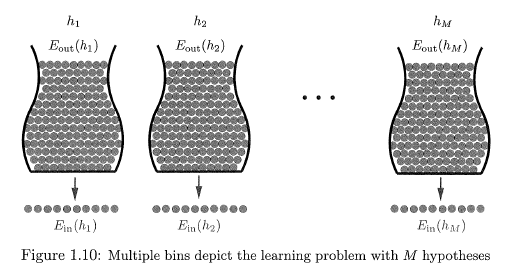

**Solución:**

i). Como las monedas son "fair" al lanzar cualquier moneda, la probabilidad de tener caras es igual a la de tener sellos y por tanto $\mu=0.5$ tanto para $c_1$ como para $c_{\text{rand}}$ y $c_{\text{min}}$.

ii). Veamos el siguiente programa.

In [ ]:
import numpy as np
''' Hacemos 100000 veces el experimento de lanzar 1000 monedas y cada una de ellas
    se lanza 10 veces independientemente, donde la probabilidad de obtener una
    cara es mu=0.5.
'''
v=np.random.binomial(10,0.5,(100000,1000))
''' Ahora calculemos v1, vmin, vrand teniendo en cuenta que estas cuentan la 
    frecuencia de caras sobre el numero de veces lanzada cada moneda.'''
v1=v[:,0]/10
vmin=v.min(axis=1)/10
vrand=np.apply_along_axis(np.random.choice,1,v)/10
'''Voy a verificar que si esté tomando las listas correctamente. '''
print(' longitud v1: ',len(v1),'\t v1=',v1,'\n',
      'longitud vmin: ',len(vmin),'\t vmin=',vmin,'\n',
      'longitud vrand: ',len(vrand),'\t vrand=',vrand)

 longitud v1:  100000 	 v1= [0.6 0.4 0.6 ... 0.4 0.4 0.5] 
 longitud vmin:  100000 	 vmin= [0.1 0.1 0.1 ... 0.1 0.1 0.1] 
 longitud vrand:  100000 	 vrand= [0.3 0.6 0.7 ... 0.9 0.6 0.4]


Histograma para v1: 


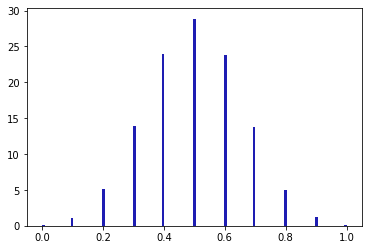

In [ ]:
'''En efecto realizamos 100000 experimentos y tomamos las fracciones deseadas.
   Veamos ahora los histogramas. '''
import matplotlib.pyplot as plt 
print("Histograma para v1: ")
nVal, bins, patches = plt.hist(x=v1, bins='auto', color='#0504aa',alpha=0.9,
                               density=True)

Histograma para vrand: 


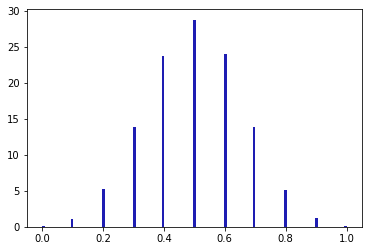

In [ ]:
print("Histograma para vrand: ")
nVal, bins, patches = plt.hist(x=vrand, bins='auto', color='#0504aa',alpha=0.9,
                               density=True)

Histograma para vmin: 


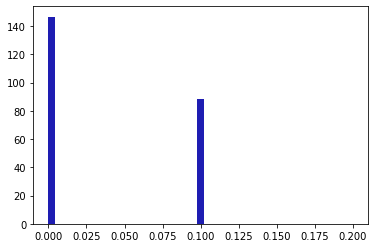

In [ ]:
print("Histograma para vmin: ")
nVal, bins, patches = plt.hist(x=vmin, bins='auto', color='#0504aa',alpha=0.9,density=True)

Notamos que $v_1$ y $v_{\text{rand}}$ tienen un comportamiento similar, lo cual es claro porque en $v_1$ estamos tomando la primera entrada en cada experimento, pero esta entrada no se escoge de una manera en específico; además, $v_1$ y $v_{\text{rand}}$ están distribuidas al rededor de $0.5=\mu$ mientras que  $v_{\text{min}}$ no.

iii). 

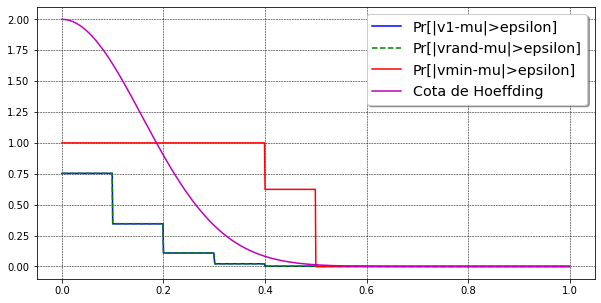

In [ ]:
mu=0.5
def cotaHoeff(epsilon):
  return 2 * np.exp(-2 *10*(epsilon**2))
a,b=0,1
epsilon = np.arange(a, b, (b-a)/1000)
y1=[]
for i in range(0,1000):
  y1.append(np.mean(np.abs(v1-mu)>epsilon[i]))
yrand=[]
for i in range(0,1000):
  yrand.append(np.mean(np.abs(vrand-mu)>epsilon[i]))
ycota= cotaHoeff(epsilon)
ymin=[]
for i in range(0,1000):
  ymin.append(np.mean(np.abs(vmin-mu)>epsilon[i]))
ycota= cotaHoeff(epsilon)
plt.figure(figsize=(10, 5))
plt.plot(epsilon, y1, 'b-',label='Pr[|v1-mu|>epsilon]')
plt.plot(epsilon, yrand, 'g--',label='Pr[|vrand-mu|>epsilon]')
plt.plot(epsilon, ymin, 'r-',label='Pr[|vmin-mu|>epsilon]')
plt.plot(epsilon, ycota, 'm-',label='Cota de Hoeffding')
plt.grid(color='k', linestyle='--', linewidth=.5)
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.show()

iv). 
Del inciso iii). vemos que $v_1$ y $v_{\text{rand}}$ cumplen la desigualdad de Hoeffding mientras que $v_{\text{min}}$ no, podemos decir intuituvamente que ello ocurre porque $v_{\text{min}}$ fue tomado específicamente luego de haber hecho los $100000$ experimentos.

v). Aquí noestamos teniendo en cuenta el número de hipótesis; pues bien, aquí cada uno de los recipientes (que refieren a una hipótesis), harían el papel de hipótesis para las fracciones y note que para el caso de $v_1$ y $v_\text{rand}$ las hipótesis son tomadas antes de ver los datos puesto que se asume que los ejemplos aleatorios, lo cual en estos dos casos es correcto y por tanto se cumple la desuguldad de Hoeffding; mientras que en el  caso de $v_\text{min}$ se asume que los ejemplos son aleatorios pero claramente no es así, nosotros necesitaríamos escoger la hipótesis una vez que son dados los datos, podemos pensar que ello hace que no se cumpla la desigualdad de Hoeffding.

**Problema 4 (Ejercicio 1.11 del libro guía):** Se da un  conjunto de datos $D$ con $25$ ejemplos de entrenamiento de una función desconocida $f: X\rightarrow Y$ con $X=\mathbb{R}$ y $Y=\{-1,1\}$. Para aprender $f$, usamos un conjunto de hipótesis simple $H=\{h_1,h_2\}$ donde $h_1$ es la función constante $1$ y $h_2$ es la función constante $-1$.

Ahora consiferamos dos algoritmos de aprendizaje, el inteligente $S$ y el loco $C$. $S$ elige la hipótesis que más concuerda con $D$ y $C$ elige la otra hipótesis deliberadamente. Veamos cómo funcionan estos algoritmos a partir de muestras desde los puntos de vista determinista y probabilístico. Asuma desde el punto de vista probabilistico que existe una distribución de probaiblidad sobre $X$ y sea $P[f(x)=1]=p$.

i). ¿$S$ puede producir una hipótesis que está garantizada para funcionar mejor aleatoriamente en cualquier punto fuera de $D$?

ii). Asumamos para el resto del ejercicio que todos los ejemplos en $D$ tienen $y_n=1$ ¿es posible que las hipótesis que produce $C$ sean mejores que las que produce $S$?

iii). Si $p=0.9$ ¿cuál es la probabilidad de que $S$ produzca una mejor hipótesis que $C$?

iv). ¿Hay algún valor para $p$ para el cual $C$ no produzca una mejor hipótesis que S?

**Solución:** 

i). Es posible garantizar esto, por ejemplo cuando esta  garantía es en el caso determinista, admitimos que $D$ nos dice algo cierto de $f$ afuera de $D$, entonces al tomar cualquier elemento aleatoriamente de $X$ tendrémos que este lo podremos relacionar con los ejemplos de $D$ de una manera determinista (cierta) y por tanto como $S$ escoge la hipótesis que más concuerda con $D$ es muy seguro que $S$ escoja la mejor hipótesis que concuerde con el nuevo dato.

ii). Note que bajo estas suposiciones el algoritmo $S$ escojerá la hipótesis $h_1$, lo cual ssignifica que para que $C$ produzca mejores hipótesis es porque el algoritmo $C$ está escogiendo a $h_2$ ($h_2$ aproxima mejor a $f$ de lo que lo hace $h_1$)y basta verificar que el error de la población de la hipótesis en el algoritmo de $C$ es menor que el error de la población de la hipótesis en el algoritmo de $S$, como veremos en los siguientes incisos esto es posible. 

iii). Para ver ello necesitamos ver cuál es la probabilidad de que el error de la población de la hipótesis generada por el algoritmo $S$ sea menor al error de la población de la hipótesis generada por el algoritmo $C$, lo cual según lo dicho en el inciso anterior es ver cuál es la probabilidad de que $f\neq h_1$ sea menor que $f\neq h_2$, pero como $h_1=1$ es función constante, $h_2=-1$ es función constante y $p=P[f(x)=1]$, entonces $P[f\neq h_1]=1-p$ y $P[f\neq h_2]=p$. Por tanto el problema de saber cuál es la probabilidad de que $S$ produzca una mejor hipótesis que $C$, se reduce a calcular $P[1-p<p]=P[0.1<0.9]=1$. 

Conclusión: la probabilidad buscada es $1$.

iv). Vea que la probabilidad de que $C$ produzca mejores hipótesis que $S$ es la probabilidad que el error en población de $h_2$ sea menor que el error en población de $h_1$; por tanto la probabilidad de que $C$ no produzca mejores hipótesis que $S$ es la probabilidad que el error en población de $h_1$ sea menor o igual que el error en población de $h_2$ y como hicimos la cuenta en el inciso anterios todo lo anterior sería $P[1-p\leq p]=P[.5\leq p]$ y esta probabilidad es no nula si y solo si $p\geq.5$

Conclusión: $p$ debe ser mayor o igual que $0.5$.

In [ ]:
from scipy.optimize import newton
def f(x):
  return x**(13)-.5
aprox= newton(f,1)
print('aprox=',aprox,'\t f(aprox)=',f(aprox))

aprox= 0.9480775143398577 	 f(aprox)= 4.704459044546638e-12


**Problema 5:** En el algoritmo de clasificación para el perceptrón ¿qué significa $\frac{||\theta^*||^2}{\gamma^2}$?

**Solución:** Recuerde que para nuestro algoritmo teníamos lo siguiente:

i). Los datos son linealmente separables; esto es, existe $\theta^*$.

ii). Existe $R>0$ tal que para todo $t$, $||x(t)||\leq R$.

iii). Existe $\gamma>0$ tal que para todo $t$, $y(t)(\theta^*)^Tx(t)\geq\gamma$.

Sabemos, además, que 
$$\cos\langle \theta^*, \theta^k\rangle=\frac{k\gamma}{\sqrt{kR^2}||\theta^*||}=\frac{\sqrt{k}\gamma}{R||\theta^*||};$$
así, dado que la función coseno es acotada por $1$ y que un escalamiento positivo de la función $f$, con $f(x)=\sqrt{x}$, siempre pasa por el punto $1$, tenemos que el algoritmo se detiene en un número finito de pasos, más aún; para todo $k$
$$\frac{\sqrt{k}\gamma}{R||\theta^*||}= \cos\langle \theta^*, \theta^k\rangle\leq1,$$
de donde
$$\sqrt{k}\leq \frac{R||\theta^*||}{\gamma},$$
luego
$$k\leq\frac{R^2||\theta^*||^2}{\gamma^2};$$
esto es, el algoritmo toma a lo más $\frac{R^2||\theta^*||^2}{\gamma^2}$ pasos. 

Por tanto, podemos ver el factor$\frac{||\theta^*||^2}{\gamma^2}$ como diciendonos qué tan sencillo es de resolver el problema; pues para $\gamma$ muy grande o $\theta^*$ muy pequeño el algoritmo tendrá pocos pasos; en el caso en el que $\gamma$ sea muy pequeño o $\theta^*$ sea muy grande no tenemos una buena interpretación de esta cota. Note que lo anterior tiene sentido con las suposiciones i). y  iii). porque si $\theta^*$ es muy pequeño, es más fácil que los $\theta_k$ lleguen hasta $\theta^*$ y si $\gamma$ es muy grande, como vimos en clase $(\theta^*)^T\cdot\theta_k-(\theta^*)^T\cdot\theta_{k-1}\geq \gamma$, lo cual hace que hayan pasos grandes entre pasos consecutivos del algoritmo, en términos de la distacia coseno, y sea más fácil llegar hasta nuestro $\theta^*$.

**Problema 6 (XOR-redes neuronales de Mcculloch Pitts):** Construya un modelo para XOR basado o con las ideas de las redes neuronales de Mcculloch Pitts.

**Solución:**  Presento dos formas de obtener esto de acuerdo a lo siguiente

*Forma 1:*

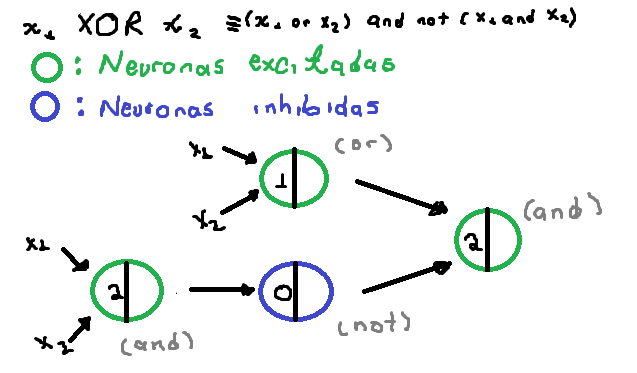

*Forma 2:*

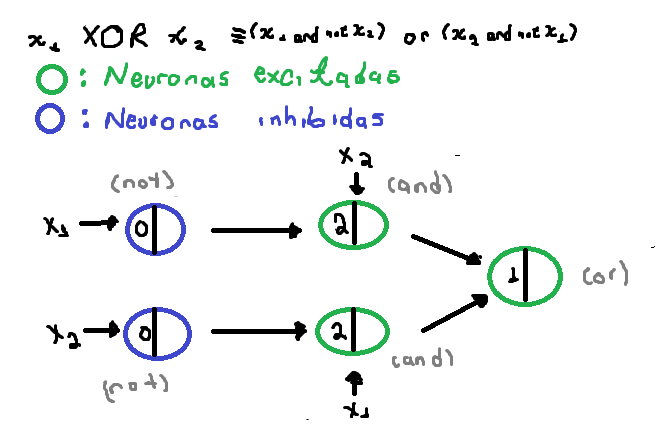